# <center> </center>
# <center> 9b. ARCH Simulation
## <center> ECO374

If using Colab, mount Google Drive and set path to files

In [1]:
import os
IN_COLAB = 'COLAB_GPU' in os.environ  
if IN_COLAB:
  from google.colab import drive; mount_path = '/content/drive'
  not os.path.ismount(mount_path) and drive.mount(mount_path)
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Python_code') # Set Python file directory

Set up R for Python

In [2]:
import R_for_Python_setup as RPY
RPY.setup_R()
ro, pandas2ri, StrVector = RPY.initialize_rpy2()
%load_ext rpy2.ipython

R installed
Operating system: Windows
Development tool: Anaconda


Load R packages

In [3]:
R_packages = ['rugarch']
RPY.load_R_packages(R_packages)

R packages loaded: rugarch


Load Python packages

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import norm; from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. ARCH(1) Simulation
Simulate ARCH(1) with several different alpha coefficients

In [5]:
ro.r('set.seed(39478693)')
T = 1000  # Number of time steps
omega = 0
ro.globalenv['T'] = T
ro.r('u = stats::rnorm(T)')
u = ro.globalenv['u']
sigma2 = np.zeros(T)

alpha = 0.3
sigma2[0] = omega/(1-alpha)
for t in range(1, T):
  sigma2[t] = omega + alpha*u[t-1]**2
r1 = np.sqrt(sigma2)*u

alpha = 0.6
sigma2[0] = omega/(1-alpha)
for t in range(1, T):
  sigma2[t] = omega + alpha*u[t-1]**2
r2 = np.sqrt(sigma2)*u

alpha = 0.9
sigma2[0] = omega/(1-alpha)
for t in range(1, T):
  sigma2[t] = omega + alpha*u[t-1]**2
r3 = np.sqrt(sigma2)*u

Plot the simulated ARCH series

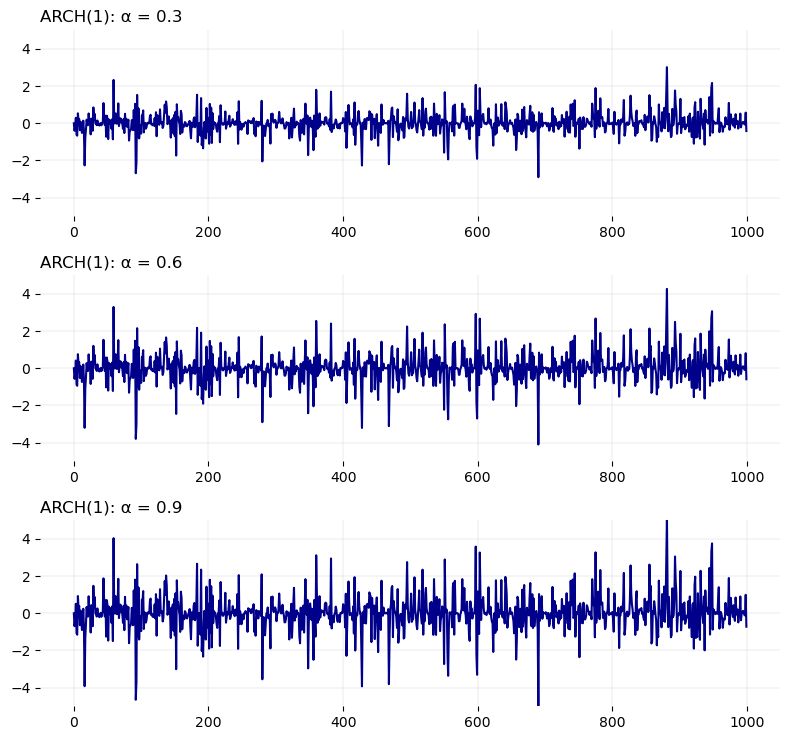

In [6]:
alpha_values = [0.3, 0.6, 0.9]
data = [r1, r2, r3]
titles = [f"ARCH(1): α = {alpha}" for alpha in alpha_values]
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 7.5))
for i, (ax, df, title) in enumerate(zip(axs, data, titles)):
    x_axis = np.arange(len(df))
    ax.plot(x_axis, df, color='darkblue')
    ax.set_title(title, loc='left')
    ax.set_ylim(-5, 5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(which='major', color='lightgrey', linewidth=0.3)
    ax.set_frame_on(False)
plt.tight_layout()
plt.show()

ACF and PACF of the ARCH draws and their square (variance) ($\alpha = 0.6$)

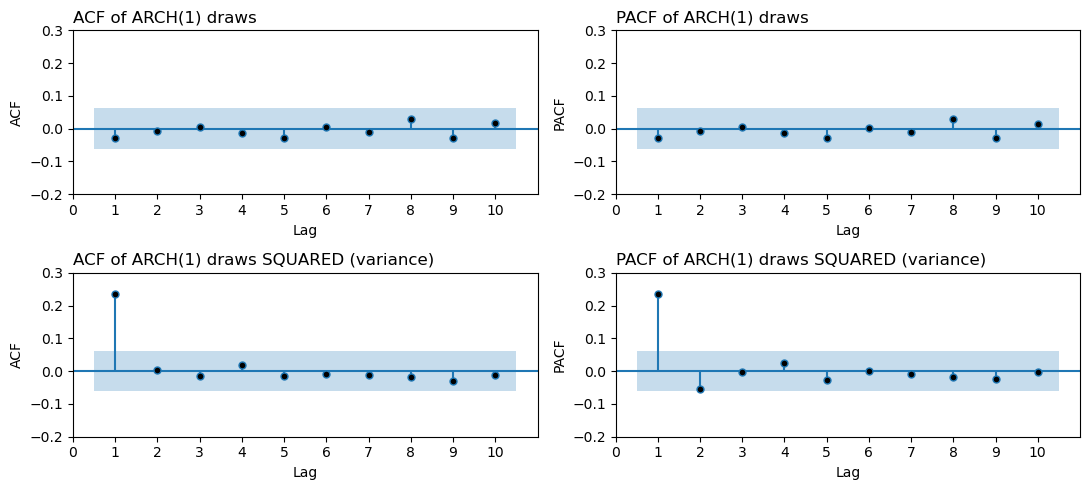

In [7]:
lag_max = 10

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 5))
axs = axs.flatten()

plot_acf(r2, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[0])
axs[0].set_title('ACF of ARCH(1) draws', loc='left')
axs[0].set_ylabel('ACF')

plot_pacf(r2, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[1])
axs[1].set_title('PACF of ARCH(1) draws', loc='left')
axs[1].set_ylabel('PACF')

plot_acf(r2**2, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[2])
axs[2].set_title('ACF of ARCH(1) draws SQUARED (variance)', loc='left')
axs[2].set_ylabel('ACF')

plot_pacf(r2**2, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[3])
axs[3].set_title('PACF of ARCH(1) draws SQUARED (variance)', loc='left')
axs[3].set_ylabel('PACF')

for ax in axs:
  ax.set_ylim(-0.2,0.3)
  ax.set_xticks(np.arange(0, lag_max+1, step=1))
  ax.set_xlabel('Lag')

fig.tight_layout()
plt.show()

Note that all the information of the process is contained in the variance.

# 2. ARCH(3) Simulation
Simulate draws from an ARCH(3) process

In [8]:
%%R
set.seed(39478693)
archp_model <- rugarch::ugarchspec(variance.model = list(model="sGARCH", garchOrder=c(3, 0)), 
               mean.model = list(armaOrder=c(0, 0)), 
               fixed.pars=list(mu=0, omega=2, alpha1=0.3, alpha2=0.1, alpha3=0.4))
archp_sim <- ugarchpath(archp_model, n.sim = 1000)
rp <- data.frame(archp_sim@path$seriesSim)
colnames(rp) <- "A3"

In [9]:
rp = ro.globalenv['rp']
rp = pandas2ri.rpy2py(rp)

Plot the simulated ARCH series

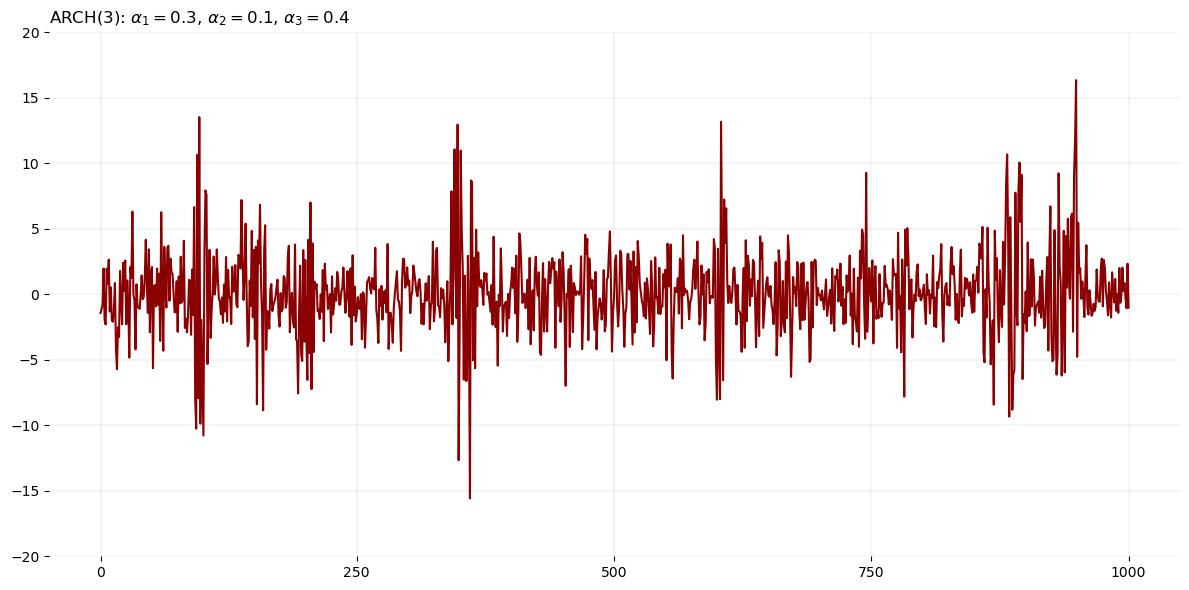

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(rp, color='darkred')
plt.xlabel("")
plt.ylabel("")
plt.xticks([0, 249, 499, 749, 999], labels=['0', '250', '500', '750', '1000'])
plt.title(r'ARCH(3): $\alpha_1 = 0.3$, $\alpha_2 = 0.1$, $\alpha_3 = 0.4$', loc='left')
plt.ylim(-20, 20)
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.tight_layout()
plt.show()

ACF and PACF of the ARCH draws and their square (variance)

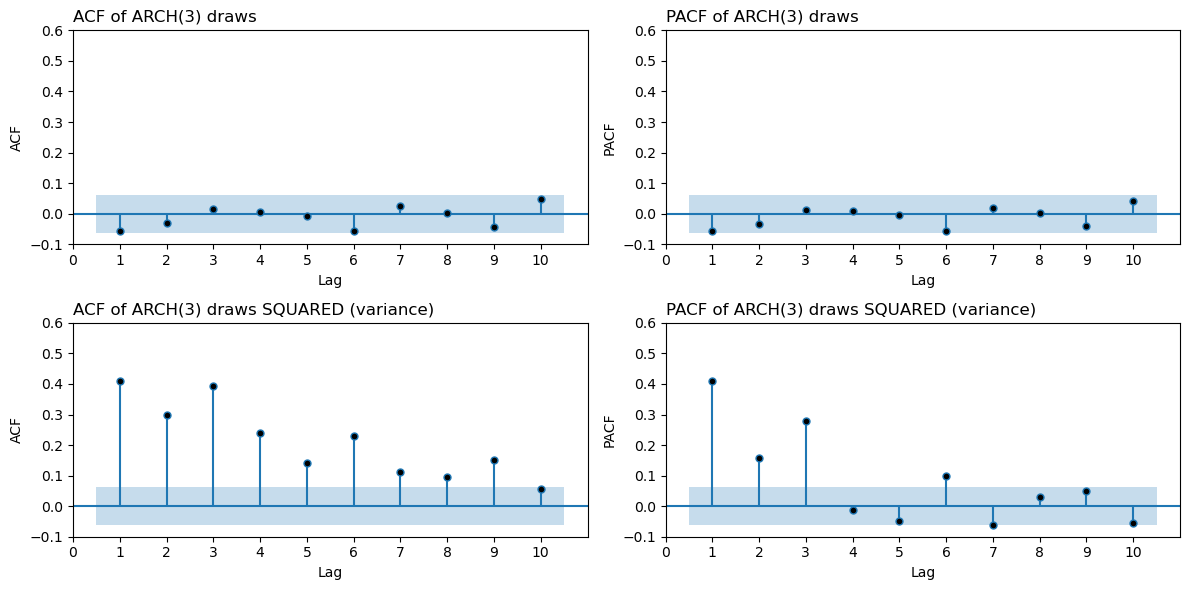

In [11]:
lag_max = 10

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axs = axs.flatten()

plot_acf(rp, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[0])
axs[0].set_title('ACF of ARCH(3) draws', loc='left')
axs[0].set_ylabel('ACF')

plot_pacf(rp, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[1])
axs[1].set_title('PACF of ARCH(3) draws', loc='left')
axs[1].set_ylabel('PACF')

plot_acf(rp**2, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[2])
axs[2].set_title('ACF of ARCH(3) draws SQUARED (variance)', loc='left')
axs[2].set_ylabel('ACF')

plot_pacf(rp**2, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[3])
axs[3].set_title('PACF of ARCH(3) draws SQUARED (variance)', loc='left')
axs[3].set_ylabel('PACF')

for ax in axs:
  ax.set_ylim(-0.1,0.6)
  ax.set_xticks(np.arange(0, lag_max+1, step=1))
  ax.set_xlabel('Lag')

fig.tight_layout()
plt.show()

Note that all the information of the process is contained in the variance.